# Music Recommendation System

**Task and Approach:**

We are working with a dataset of songs in Spotify including the full list of genres

**Step 1 :** Importing Libraries and Understanding Data

In [1]:
%matplotlib inline  
# To make data visualisations display in Jupyter Notebooks 
import numpy as np   # linear algebra
import pandas as pd  # Data processing, Input & Output load
import matplotlib.pyplot as plt # Visuvalization & plotting
import seaborn as sns # Also for Data visuvalization 

from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance

import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")


**Step 2 :** Loading Data  & Cross checking 

In [2]:
song_data = pd.read_csv('genres_v2.csv') 

In [3]:
song_data.shape

(42305, 22)

In [4]:
song_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [5]:
song_data.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

## Visualizing the Data 

<AxesSubplot:>

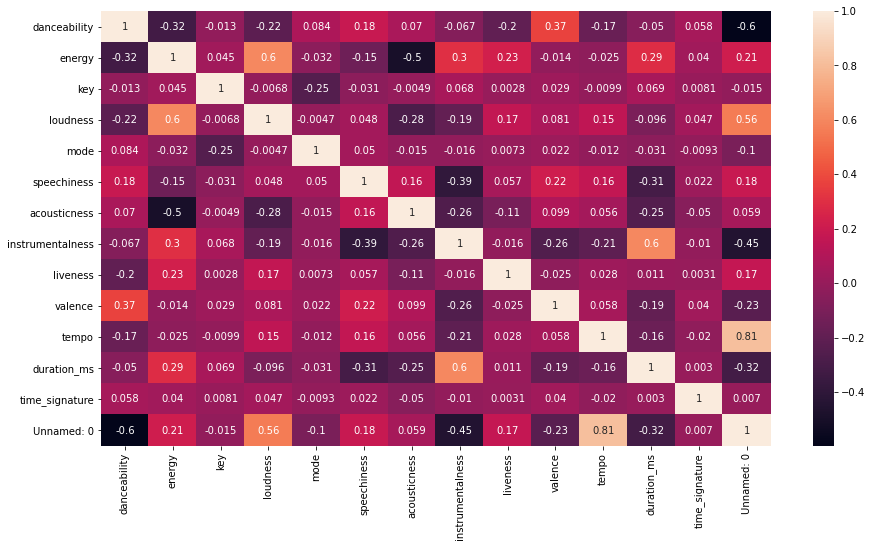

In [6]:
plt.figure(figsize = (15,8))
sns.heatmap(song_data.corr(),annot=True)

## Cleaning and Standardizing the data

In [7]:
song_data.drop('Unnamed: 0',axis=1,inplace=True) #since the 'Unnamed' column is unlikely to influence our recommender

In [8]:
song_data=song_data.dropna(subset=['song_name']) #we are dropping the rows with null values for the 'song_name column

In [9]:
# Creating a new dataframe with required features
song_df=song_data[song_data.columns[:11]]
song_df['genre']=song_data['genre']
song_df['time_signature']=song_data['time_signature']
song_df['duration_ms']=song_data['duration_ms']
song_df['song_name']=song_data['song_name']
song_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,time_signature,duration_ms,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,Dark Trap,4,124539,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,Dark Trap,4,224427,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,Dark Trap,4,98821,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,Dark Trap,3,123661,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,Dark Trap,4,123298,Venom


In [10]:
#The data needs to be standardized because the column 'duration_ms' has much larger values than the rest of the fields
x=song_df[song_df.drop(columns=['song_name','genre']).columns].values
scX = StandardScaler()
x=scX.fit_transform(x)
song_df[song_df.drop(columns=['song_name','genre']).columns]=x

## Functions to find relatabilty and correlation

In [11]:
# This is a function to find the closest song name from the list
def find_song(song,songs):
    l=[]
    count=0
    if song[-1]==' ':
        song=song[:-1]
    for i in songs:
        if song.lower() in i.lower():
            l.append([len(song)/len(i),count])
        else:
            l.append([0,count])
        count+=1
    l.sort(reverse=True)
    return songs[l[0][1]]
        

In [12]:
def make_matrix_correlation(data,song,number):
    df=pd.DataFrame()
    data.drop_duplicates(inplace=True)
    songs=data['song_name'].values
    best=find_song(song,songs)
    print('The recommended songs for %s are' %best)
    genre=data[data['song_name']==best]['genre'].values[0]
    df=data[data['genre']==genre]
    x=df[df['song_name']==best].drop(columns=['genre','song_name']).values
    if len(x)>1:
        x=x[1]
    song_names=df['song_name'].values
    df.drop(columns=['genre','song_name'],inplace=True)
    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.values:
        p.append([distance.correlation(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        print(song_names[p[i][1]])

In [13]:
m=input('Enter the name of the song :')
n=int(input('Enter the number of song recommendations: '))
make_matrix_correlation(song_df,m,n)

Enter the name of the song :Numb
Enter the number of song recommendations: 10
The recommended songs for NUMB are
FIND YOUR WINGS (feat. Roy Ayers, Sydney Bennett & Kali Uchis)
Trip
Thuggin’
HIGHEST IN THE ROOM
Not You Too (feat. Chris Brown)
SOHO
PALACE
For You
I Fall Apart
nineteen
